In [71]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.util import ngrams

import spacy
import pyLDAvis.gensim_models
import gensim
from gensim import models
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [38]:
file_c = f'./data/preprocessed/conspiracy_preprocessed_filtered.csv'
df_c = pd.read_csv(file_c)
file_u = f'./data/preprocessed/ukraine_preprocessed_filtered.csv'
df_u = pd.read_csv(file_u)

C:\Users\1408\AppData\Local\Temp\ipykernel_29752\285732340.py:4: DtypeWarning: Columns (86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_u = pd.read_csv(file_u)


In [39]:
def removeDeleted(dataframe):
    dataframe['title'] = dataframe['title'].apply(str) 
    dataframe['selftext'] = dataframe['selftext'].apply(str) 
    dataframe.loc[dataframe['title'].isin({ "remove", "delete", "nan"}),'title'] = ""
    dataframe.loc[dataframe['selftext'].isin({ "remove", "delete", "nan"}),'selftext'] = ""
    dataframe['wholetext'] = dataframe['title'] + " " + dataframe['selftext']
    dataframe = dataframe[['selftext','title','wholetext']]

def removeStopWords(data, stop):
    submissions = []
    for string in data:
        string = [word for word in string.split() if word not in stop]
        #submission = [word for word in submission.split()]
        submissions.append(' '.join(string))
    return submissions

In [40]:
def build_corpus(data):
    corpus = []
    for string in data:
        word_list = string.split(" ")
        corpus.append(word_list)
            
    return corpus

    

In [80]:
removeDeleted(df_c)
wholetext_c = df_c.wholetext.values
submissions_c = removeStopWords(wholetext_c, nltk.corpus.stopwords.words('english'))

data_c = [string.split(" ") for string in submissions_c]
data_c_bi = []
for doc in data_c:
    data_c_bi.append(doc + ["_".join(w) for w in ngrams(doc, 2)])

removeDeleted(df_u)
wholetext_u = df_u.wholetext.values
submissions_u = removeStopWords(wholetext_u, nltk.corpus.stopwords.words('english'))

data_u = [string.split(" ") for string in submissions_u]

In [42]:

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [66]:
bigram = gensim.models.Phrases(data_c, min_count=5, threshold=40) # higher threshold fewer phrases.

bigram_mod = gensim.models.phrases.Phraser(bigram)

data_words_bigrams = [bigram_mod[doc] for doc in data_c]

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out




c:\Users\1408\AppData\Local\Programs\Python\Python310\lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
c:\Users\1408\AppData\Local\Programs\Python\Python310\lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
c:\Users\1408\AppData\Local\Programs\Python\Python310\lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
c:\Users\1408\AppData\Local\Programs\Python\Python310\lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.g

In [77]:
dictionary = Dictionary(data_c)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in data_c]

In [8]:
"""from gensim.models import CoherenceModel


topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()"""

"from gensim.models import CoherenceModel\n\n\ntopics = []\nscore = []\nfor i in range(1,20,1):\n   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)\n   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')\n   topics.append(i)\n   score.append(cm.get_coherence())\n_=plt.plot(topics, score)\n_=plt.xlabel('Number of Topics')\n_=plt.ylabel('Coherence Score')\nplt.show()"

In [9]:
"""topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = data_c, corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()"""

"topics = []\nscore = []\nfor i in range(1,20,1):\n   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)\n   cm = CoherenceModel(model=lda_model, texts = data_c, corpus=corpus, dictionary=dictionary, coherence='c_v')\n   topics.append(i)\n   score.append(cm.get_coherence())\n_=plt.plot(topics, score)\n_=plt.xlabel('Number of Topics')\n_=plt.ylabel('Coherence Score')\nplt.show()"

In [31]:
def ldamodel(data):
    dictionary = Dictionary(data)
    dictionary.filter_extremes(no_below=5, no_above=0.5)
    corpus = [dictionary.doc2bow(text) for text in data]
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    print(corpus_tfidf)
    num_topics = 8
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=4, passes=10, random_state=42)
    print(lda_model.print_topics())
    return pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [69]:
pyLDAvis.display(ldamodel(data_u))

[(0, '0.048*"ukraine" + 0.015*"people" + 0.013*"slava" + 0.011*"war" + 0.011*"stand" + 0.010*"fight" + 0.010*"ukrainian" + 0.010*"ukraini" + 0.009*"support" + 0.008*"one"'), (1, '0.050*"russia" + 0.049*"putin" + 0.024*"war" + 0.019*"ukraine" + 0.019*"russian" + 0.013*"world" + 0.011*"would" + 0.010*"sanction" + 0.009*"country" + 0.009*"fuck"'), (2, '0.066*"russian" + 0.048*"ukraine" + 0.019*"russia" + 0.014*"ukrainian" + 0.012*"invasion" + 0.012*"war" + 0.011*"support" + 0.008*"force" + 0.007*"state" + 0.006*"say"'), (3, '0.055*"russian" + 0.039*"kyiv" + 0.029*"ukraine" + 0.012*"force" + 0.012*"tank" + 0.011*"city" + 0.011*"kiev" + 0.010*"russia" + 0.010*"air" + 0.009*"attack"'), (4, '0.046*"ukrainian" + 0.033*"russian" + 0.022*"border" + 0.018*"soldier" + 0.014*"need" + 0.013*"polish" + 0.009*"help" + 0.007*"visa" + 0.007*"information" + 0.007*"please"'), (5, '0.027*"russian" + 0.017*"ukrainian" + 0.014*"post" + 0.012*"people" + 0.010*"like" + 0.010*"know" + 0.010*"make" + 0.009*"get"

c:\Users\1408\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/
https://www.analyticsvidhya.com/blog/2021/06/part-3-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/


In [82]:
pyLDAvis.display(ldamodel(data_c))

[(0, '0.011*"syndrome" + 0.011*"positive" + 0.010*"nazi" + 0.008*"post" + 0.008*"increase" + 0.007*"anti" + 0.007*"disease" + 0.007*"putin" + 0.006*"2" + 0.006*"war"'), (1, '0.044*"putin" + 0.023*"russia" + 0.023*"trump" + 0.018*"biden" + 0.012*"president" + 0.010*"get" + 0.009*"like" + 0.008*"russian" + 0.007*"go" + 0.007*"think"'), (2, '0.023*"russia" + 0.016*"russian" + 0.013*"us" + 0.013*"war" + 0.011*"nato" + 0.009*"ukrainian" + 0.009*"putin" + 0.008*"would" + 0.007*"world" + 0.006*"country"'), (3, '0.027*"russia" + 0.019*"war" + 0.014*"people" + 0.010*"country" + 0.010*"us" + 0.010*"putin" + 0.010*"like" + 0.009*"think" + 0.009*"would" + 0.009*"make"'), (4, '0.014*"people" + 0.012*"like" + 0.011*"know" + 0.010*"go" + 0.009*"one" + 0.009*"war" + 0.008*"us" + 0.008*"see" + 0.008*"time" + 0.007*"get"'), (5, '0.019*"russian" + 0.019*"russia" + 0.018*"thing" + 0.018*"go" + 0.012*"ukrainian" + 0.008*"war" + 0.008*"get" + 0.007*"say" + 0.006*"putin" + 0.006*"take"'), (6, '0.026*"world" 

c:\Users\1408\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [13]:
from gsdmm import MovieGroupProcess
https://towardsdatascience.com/a-unique-approach-to-short-text-clustering-part-1-algorithmic-theory-4d4fad0882e1

GSDMM https://www.kaggle.com/code/ptfrwrd/topic-modeling-guide-gsdm-lda-lsi/notebook

In [17]:
mgp = MovieGroupProcess(K=15, alpha=0.01, beta=0.01, n_iters=100)

vocab = set(x for doc in data_u for x in doc)
n_terms = len(vocab)
model = mgp.fit(data_u, n_terms)

In stage 0: transferred 22321 clusters with 15 clusters populated
In stage 1: transferred 15262 clusters with 15 clusters populated
In stage 2: transferred 10128 clusters with 15 clusters populated
In stage 3: transferred 7436 clusters with 15 clusters populated
In stage 4: transferred 6072 clusters with 15 clusters populated
In stage 5: transferred 5606 clusters with 15 clusters populated
In stage 6: transferred 5079 clusters with 15 clusters populated
In stage 7: transferred 4804 clusters with 15 clusters populated
In stage 8: transferred 4628 clusters with 15 clusters populated
In stage 9: transferred 4469 clusters with 15 clusters populated
In stage 10: transferred 4292 clusters with 15 clusters populated
In stage 11: transferred 4351 clusters with 15 clusters populated
In stage 12: transferred 4278 clusters with 15 clusters populated
In stage 13: transferred 4237 clusters with 15 clusters populated
In stage 14: transferred 4263 clusters with 15 clusters populated
In stage 15: tran

In [18]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(
            mgp.cluster_word_distribution[cluster].items(),
            key=lambda k: k[1],
            reverse=True,
        )[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — — ')

doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)


# Show the top 10 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 30)

Number of documents per topic : [ 708 1602  679 1503  798 1459 1006 1267  631 3373 1075  128 1794 2029
 7538]
********************
Most important clusters (by number of docs inside): [14  9 13 12  1  3  5  7 10  6]
********************
Cluster 14 : [('ukraine', 6396), ('russian', 4599), ('russia', 3486), ('ukrainian', 2822), ('people', 2485), ('putin', 2446), ('war', 2340), ('would', 1653), ('go', 1516), ('help', 1500), ('get', 1395), ('like', 1385), ('country', 1368), ('know', 1352), ('make', 1317), ('want', 1232), ('us', 1232), ('see', 1169), ('say', 1157), ('fight', 1156), ('one', 1140), ('world', 1130), ('use', 1063), ('take', 1027), ('support', 966), ('need', 954), ('force', 929), ('military', 891), ('time', 872), ('post', 830)]
 — — — — — — — — — 
Cluster 9 : [('russian', 2123), ('ukraine', 1116), ('kyiv', 732), ('ukrainian', 713), ('force', 435), ('tank', 340), ('russia', 319), ('military', 266), ('convoy', 261), ('kharkiv', 243), ('city', 236), ('near', 235), ('troop', 227), ('

In [ ]:

#model = word2vec.Word2Vec(corpus, vector_size=200, window=20, min_count=50, workers=4)
sims = model.wv.most_similar('klaus', topn=10) 
print(sims)

NameError: name 'model' is not defined

c:\Users\1408\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\1408\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

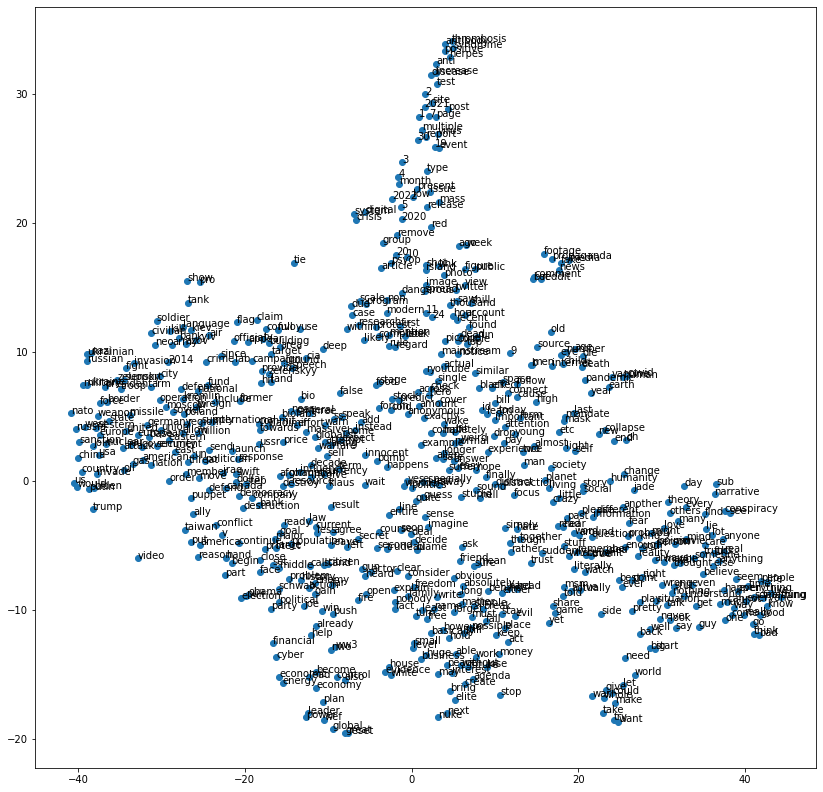

In [ ]:
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index.keys():
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()